<table style="width: 100%;" id="nb-header">
    <tr style="background-color: transparent;"><td>
        <img src="https://data-88e.github.io/assets/images/blue_text.png" width="250px" style="margin-left: 0;" />
    </td><td>
        <p style="text-align: right; font-size: 10pt;"><strong>Economic Models</strong>, EdX<br>
            Dr. Eric Van Dusen <br>
            Kidong Kim <br>
        Akhil Venkatesh <br>
</table>

# Lecture Notebook 3.2: Plotting Externalities

The idea behind this demo is to utilize the class demand survey to motivate the concept of surplus.


In [13]:
from datascience import *
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

import sympy
solve = lambda x,y: sympy.solve(x-y)[0] if len(sympy.solve(x-y))==1 else "Not Single Solution"

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

## Section 1: Market Demand and Consumer Surplus

Let's start off with the demand from a student demand survey:
 - We had 4 "goods" and a range of prices available for each good
 - Students made bids on their willingness to pay for each of the 4 goods
 - The dataset for Fall 2022 has ~100 observations
 - This dataset has been exported and we read it in below:

In [15]:
DemandTable = Table.read_table("Data88EDemandSurvey-Fall22.csv")
DemandTable = DemandTable.drop('Timestamp')
DemandTable

Masks,Burrito,GreekTix,iPhone
1,10,100,1000
0.25,5,25,1500
1,15,100,1000
1,12.5,100,1000
1,7.5,100,1250
1.5,7.5,50,1000
1.5,7.5,150,750
1,10,100,1500
0.25,5,100,1500
1.25,10,75,1250


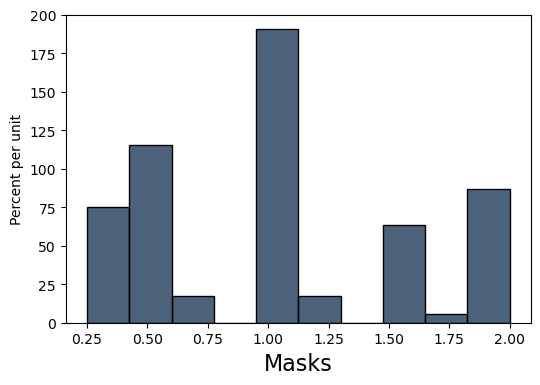

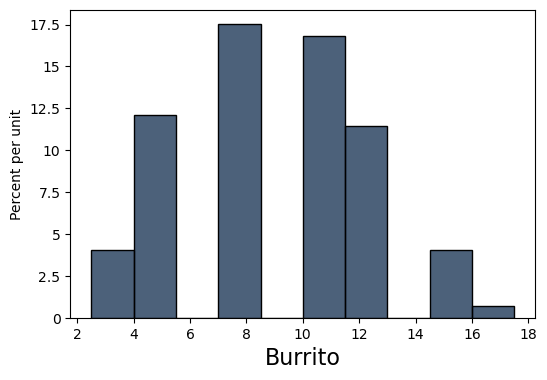

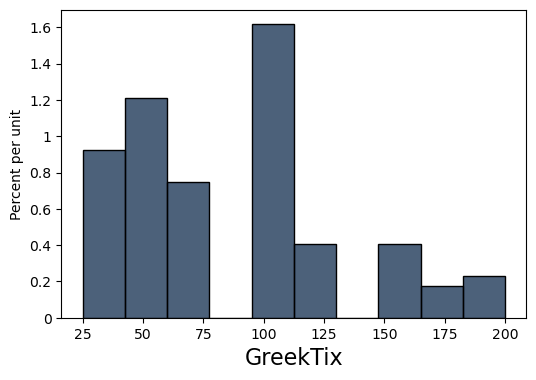

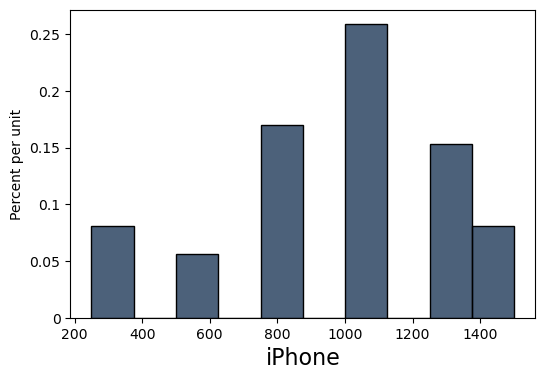

In [16]:
for i in DemandTable.labels:
    DemandTable.hist(i);

**Let's focus on the burritos first.** How many people are willing to buying a gourment burrito at any given price?   
We can assume that a person would be willing to buy the good at a price less than their bid price.  

In [17]:
BurritosTable = DemandTable.select('Burrito')
BurritosTable

Burrito
10
5
15
12.5
7.5
7.5
7.5
10
5
10


In [18]:
# Count how many people are in each answer pool
BurritosTable.group("Burrito")

Burrito,count
2.5,6
5,18
7.5,26
10,25
12.5,17
15,6
17.5,1


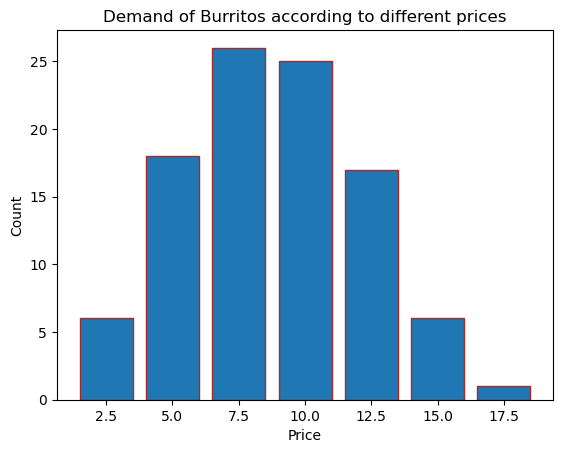

In [19]:
# Create a bar plot
table = BurritosTable.group("Burrito")

def plot_histogram(data, bins, title="Title", x_label = "Price", y_label = "Count"):
    plt.bar(bins, data, edgecolor="brown", align="center", width = 2)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    return 

burrito_bins = table.column(0) # Select column using method call
burrito_data = table['count'] # Select column using indexing
burrito_title = "Demand of Burritos according to different prices"

plot_histogram(burrito_data, burrito_bins, burrito_title)

In the visualization above, the height of each bar isn't quite right - someone who is willing to pay \\$10 for a burrito will also pay \\$2.5 for the same burrito. 

Since people will pay up to their maximum bid price, let's change the visualization and the table to instead consider the **total demand** at any given price. 
We can do this in the following three steps: 
1. Flip the order of the count column
2. Apply a cumulative function of all prices below
3. Flip it back

In [20]:
Q0 = BurritosTable.group("Burrito").column("count")
Q0

array([ 6, 18, 26, 25, 17,  6,  1])

In [21]:
# Step 1: Flip the order of the count column
Q1 = np.flip(Q0)
Q1

array([ 1,  6, 17, 25, 26, 18,  6])

In [22]:
# Step 2: Apply a cumulative function of all prices below
Q2 = np.cumsum(Q1)
Q2

array([ 1,  7, 24, 49, 75, 93, 99])

In [23]:
# Step 3: Flip it back
Q3 = np.flip(Q2)
Q3

array([99, 93, 75, 49, 24,  7,  1])

In [24]:
# Or we can do this in just one line
Qdemand = np.flip(np.cumsum(np.flip(BurritosTable.group("Burrito").column("count"))))
Qdemand

array([99, 93, 75, 49, 24,  7,  1])

In [25]:
# Combine the price column and demand column into a single table
DemandBurr= Table().with_columns([
    'priceBurr', [2.5, 5, 7.5, 10.00, 12.5, 15,17.5], # those are the prices
    'Qdemand', Qdemand
])
DemandBurr

priceBurr,Qdemand
2.5,99
5,93
7.5,75
10,49
12.5,24
15,7
17.5,1


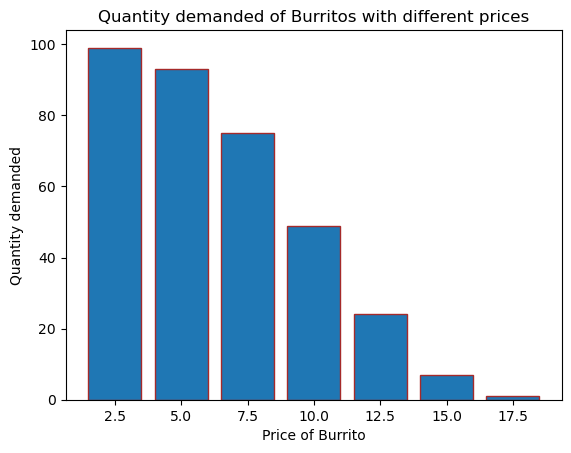

In [26]:
# Create a bar plot
burrito_Qdemand_bins = DemandBurr.column('priceBurr') # Select column using method call
burrito_Qdemand_data = DemandBurr['Qdemand'] # Select column using indexing
burrito_Qdemand_title = "Quantity demanded of Burritos with different prices"
Qdemand_x_label = "Price of Burrito"
Qdemand_y_label = "Quantity demanded"

plot_histogram(burrito_Qdemand_data, burrito_Qdemand_bins, burrito_Qdemand_title, Qdemand_x_label, Qdemand_y_label)

### Let's take a look at this table and think about the Consumer Surplus

First, let's sort the table from the most expensive burritos to the least expensive ones. 

Then, if the price is \\$10, how many people are willing to pay more than the price? These people would be getting a **surplus** by only having to pay a cheaper price than the one they would be willing to pay.

In [27]:
DemandBurr.sort("priceBurr", descending = True)

priceBurr,Qdemand
17.5,1
15,7
12.5,24
10,49
7.5,75
5,93
2.5,99


It looks like 
- 24 people would have been willing to pay up to \\$12.5
- 7 people would have been willing to pay up to \\$15.0
- 1 person would have been willing to pay up to \\$17.5
- 0 people would have been willing to pay up to \\$20.0

Let's add up these values

In [28]:
CS_counting = 24*(12.5-10)+7*(15-10)+1*(17.5-10)+0*(20-10)
print('The consumer surplus from counting consumers is', CS_counting)

The consumer surplus from counting consumers is 102.5


In [29]:
# calculate the total consumer surplus given a demand table and the price of the good
def consumer_surplus(demand_table, price):
    
    # only people with a willingness to pay higher than the market price will buy the good
    demand_table_in_market = demand_table.where(0, are.above_or_equal_to(price))
    
    cs = (demand_table_in_market.column(0) - price) * demand_table_in_market.column(1)
    total_cs = sum(cs)
    
    return total_cs

In [30]:
cs_burrito = consumer_surplus(DemandBurr, 10)
print('The consumer surplus from counting consumers is', cs_burrito)

The consumer surplus from counting consumers is 102.5


How can we visualize the consumer surplus on the demand and supply diagram? We'll start by creating a demand curve first like before. 

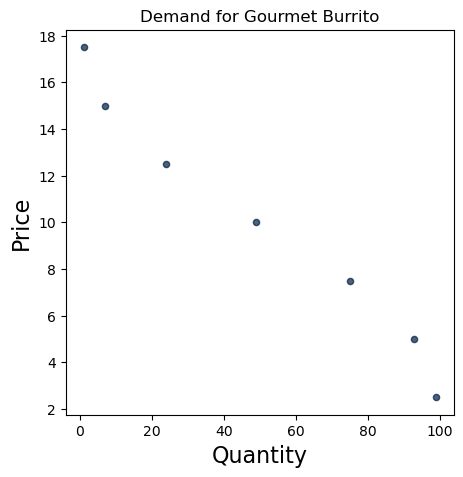

In [31]:
DemandBurr.scatter("Qdemand", "priceBurr")
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Demand for Gourmet Burrito');

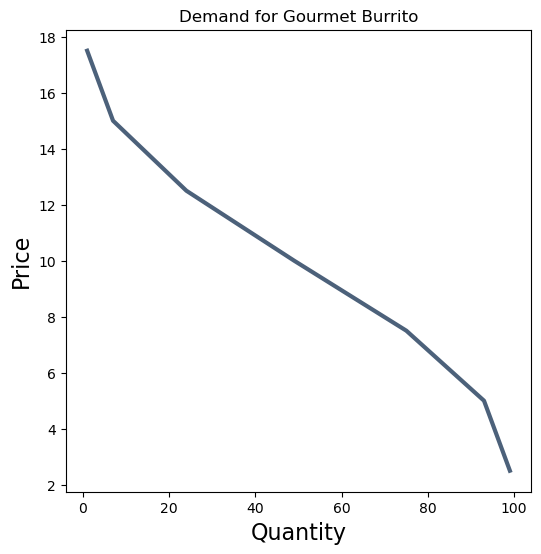

In [32]:
DemandBurr.plot("Qdemand", "priceBurr", linewidth= 3)
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Demand for Gourmet Burrito');

Now that we have a demand curve - Let's create for a model that makes a linear approximation like we did in lecture 2. 

In [33]:
DemandGM = np.polyfit(DemandBurr.column("Qdemand"), DemandBurr.column("priceBurr"),1)
DemandGM

array([ -0.13186853,  16.55574989])

In [34]:
burr_slope = DemandGM.item(0)
burr_slope

-0.13186853228392356

In [35]:
burr_intercept = DemandGM.item(1)
burr_intercept

16.555749890686485

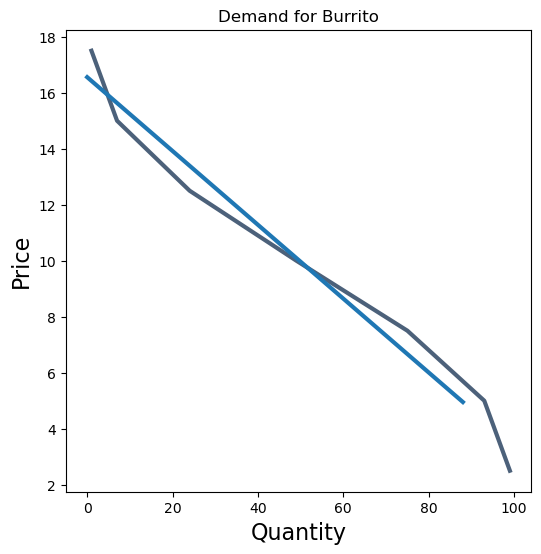

In [37]:
# plot the actual demand curve
DemandBurr.plot("Qdemand", "priceBurr", linewidth=3)

# plot the linear approximation
burr_quantities = np.arange(0,88,0.01)
burr_prices = burr_slope * burr_quantities + burr_intercept
plt.plot(burr_quantities, burr_prices, linewidth=3)

plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Demand for Burrito');

How many people does the model think would buy burritos when its price is \\$10? Let's answer this question using sympy. 

In [38]:
# Set up the demand curve expression 
Q = sympy.Symbol("Q")
demand = burr_slope * Q + burr_intercept

# Solve for Q_star when price is 10
Q_Star = solve(demand, 10)
Q_Star

49.7142857142856

Now we will visualize the consumer surplus of the burrito market. 

Consumer surplus is equal to green triangle: 162.957211568492


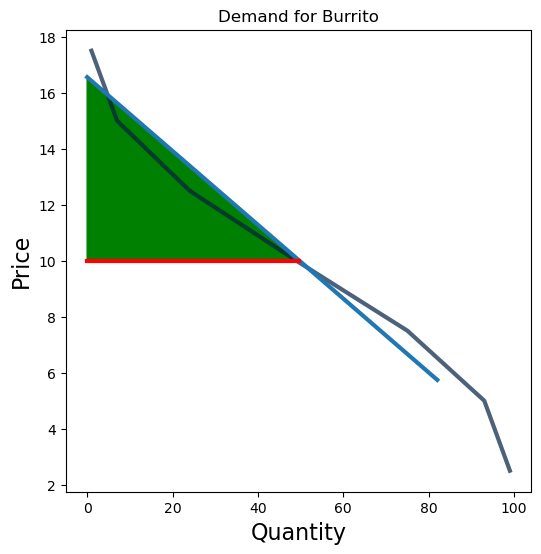

In [39]:
DemandBurr.plot("Qdemand", "priceBurr", linewidth= 3) #Black : Demand for buritto

plt.plot(np.arange(0,82,0.01), burr_slope * np.arange(0,82,0.01) + burr_intercept, linewidth= 3) #Blue : 

price = 10
plt.plot([0,Q_Star],[price, price], color = 'r', linewidth= 3) #Red : Price

triangle1 = patches.Polygon([[0,10],[Q_Star,10],[0,burr_intercept]],True,color="green") #Consumer surplus
currentAxis = plt.gca()
currentAxis.add_patch(triangle1)

plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Demand for Burrito')

burr_price = 10

# Code for Slope and Intercept - What are the slope and intercept of the fit line
std_units = lambda a: (a - np.mean(a)) / np.std(a)
corr = lambda x, y: np.mean(std_units(x) * std_units(y))
slope = lambda x, y: corr(x, y) * np.std(y) / np.std(x)
intercept = lambda x, y: np.mean(y) - slope(x, y) * np.mean(x)



# Sums up the surplus at the give price
def surplus(bins, data, price):
    #Finding the quatity at the point where red line indicating surplus and blue line indicating the relationship btw quantiy and price.
    slope_sur = slope(data, bins)
    intercept_sur = intercept(data, bins)
    Q = sympy.Symbol("Q")
    demand = slope_sur * Q + intercept_sur
    Q_Star = solve(demand, price)
    
    #Sums up the surplus and print it out.
    total_surplus = .5 * Q_Star * (intercept_sur - price)
    return total_surplus

agg_surplus = surplus(DemandBurr["priceBurr"], DemandBurr["Qdemand"], burr_price)
print("Consumer surplus is equal to green triangle: " + str(0.5 * (burr_intercept - burr_price) * Q_Star))

###  Let's try again for Greek Theater Tickets 

In [ ]:
GreekTixTable = DemandTable.select('GreekTix')
GreekTixTable

In [ ]:
# apply the same trick to obtain demand at each price
Qdemand = np.flip(np.cumsum(np.flip(GreekTixTable.group("GreekTix").column("count"))))

In [ ]:
DemandGreekTix = Table().with_columns([
    'priceTix', [25, 50, 75, 100, 125, 150, 175, 200],
    'Qdemand', Qdemand
])
DemandGreekTix

In [ ]:
tix_slope = slope(DemandGreekTix["Qdemand"], DemandGreekTix["priceTix"])
tix_intercept = intercept(DemandGreekTix["Qdemand"], DemandGreekTix["priceTix"])
tix_slope, tix_intercept

How many people does the Model think would buy at \\$100? Let's again use sympy. 

In [ ]:
solve = lambda x,y: sympy.solve(x-y)[0] if len(sympy.solve(x-y))==1 else "Not Single Solution"
Q = sympy.Symbol("Q")
demand = tix_slope * Q + tix_intercept

Q_Star = solve(demand, 100)
Q_Star

Visualize the consumer surplus for Greek Theater tickets!

In [ ]:
DemandGreekTix.plot("Qdemand", "priceTix", linewidth=3, zorder=20) #Black : Demand for Greek Theater

triangle1 = patches.Polygon([[0,100],[Q_Star,100],[0,tix_intercept]], True, color="green", zorder=1)
currentAxis = plt.gca()
currentAxis.add_patch(triangle1)

plt.plot(np.arange(0,82,0.01), tix_slope * np.arange(0,82,0.01) + tix_intercept, linewidth= 3, zorder=5) #Blue : Demand

price = 100

# This line to interactive version
plt.plot([0,Q_Star],[price]*2, color = 'r', linewidth= 3, zorder = 10) #Red : Price

plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Demand for Greek Theater Tickets');

agg_surplus = surplus(DemandGreekTix["priceTix"], DemandGreekTix["Qdemand"], price)
print("Consumer surplus is equal to green triangle: " + str(agg_surplus))

## Section 2: Fun with widgets

What about if we have different prices for burritos or Greek Theater tickets? How would the consumer surplus change? Let's see this using widgets!

In [ ]:
p = sympy.Symbol("p")
def Equilibrium(demandParam, supplyParam, priceStart):
    demandEquation = demandParam - p
    # change the slope
    supplyEquation = p * (supplyParam/10)
    priceEnd = sympy.solve(demandEquation)[0]
    prices = []
    demandQ = []
    supplyQ = []
    for price in range(priceStart,priceEnd+1):
        prices += [price]
        demandQ += [demandEquation.subs(p,price)]
        supplyQ += [supplyEquation.subs(p,price)]
    
    equilibriumP = sympy.solve(demandEquation-supplyEquation)[0]
    equilibriumQ = demandEquation.subs(p,equilibriumP)
    
    
    
    triangle1 = patches.Polygon([[equilibriumQ,equilibriumP],[0,equilibriumP],[0,priceEnd]],True,color="green")
    triangle2 = patches.Polygon([[equilibriumQ,equilibriumP],[0,equilibriumP],[0,0]],True,color="red")
    currentAxis = plt.gca()
    currentAxis.add_patch(triangle1)
    currentAxis.add_patch(triangle2)
    
    plt.plot(demandQ,prices)
    plt.plot(supplyQ,prices)
    plt.legend(["Demand","Supply"])
    plt.plot(equilibriumQ,equilibriumP, 'ro')
    plt.xlabel("Supply and Demand Quantity")
    plt.ylabel("Price")
    plt.ylim(0, 15)
    plt.xlim(0, 10)
    plt.show()
    print("The equilibrium price is "+str(round(equilibriumP,2))[0:4]+" and equilibrium quantity is "+str(round(equilibriumQ,2))[0:4]+".")
    print("The consumer surplus at this equilibrium "+str((priceEnd-equilibriumP)*(equilibriumQ)*.5)[0:4])
    print("The producer surplus at this equilibrium "+str((equilibriumP)*(equilibriumQ)*.5)[0:4])
# you can change the range here
slider1 = widgets.IntSlider(min=5, max=15,step=1,value=10)
slider2 = widgets.IntSlider(min=1, max=20,step=1,value=10)
slider3 = widgets.IntSlider(min=-5, max=5,step=1,value=0)
display(widgets.interactive(Equilibrium, demandParam=slider1, supplyParam=slider2, priceStart=slider3))

What happens if there're taxes in the market? 

In [ ]:
# solves for the market equilirium given tax
def eqSolve(eq1,eq2,tax):
    demandP = sympy.solve(eq1-q,p)[0]
    supplyP = sympy.solve(eq2-q,p)[0]
    demandP = demandP-cTax
    supplyP = supplyP+pTax

    demandQ = sympy.solve(demandP-p,q)[0]
    supplyQ = sympy.solve(supplyP-p,q)[0]
    
    return sympy.solve((demandP-supplyP, demandQ-supplyQ,tax-cTax-pTax), q,p,cTax,pTax)[q]

In [ ]:
p = sympy.Symbol("p")
q = sympy.Symbol("q")
cTax = sympy.Symbol("cTax")
pTax = sympy.Symbol("pTax")

def EquilibriumTax(demandParam,supplyParam,priceStart,priceEnd,tax):
    demandEquation = demandParam - p
    supplyEquation = p * (supplyParam/10)
    prices = []
    demand = []
    supply = []
    for price in range(priceStart,priceEnd+1):
        prices += [price]
        demand += [demandEquation.subs(p,price)]
        supply += [supplyEquation.subs(p,price)]
        
    
    
    nonTaxPrice = sympy.solve(demandEquation-supplyEquation)[0]
    nonTaxQ = demandEquation.subs(p,nonTaxPrice)

    
    equilibriumQ = eqSolve(demandEquation,supplyEquation,tax)
    equilibriumP1 = sympy.solve(demandEquation-equilibriumQ)[0]
    equilibriumP2 = sympy.solve(supplyEquation-equilibriumQ)[0]
    
    triangle1 = patches.Polygon([[nonTaxQ,nonTaxPrice],[equilibriumQ,nonTaxPrice],[equilibriumQ,equilibriumP1]],True,color="green")
    triangle2 = patches.Polygon([[nonTaxQ,nonTaxPrice],[equilibriumQ,nonTaxPrice],[equilibriumQ,equilibriumP2]],True)
    currentAxis = plt.gca()
    currentAxis.add_patch(triangle1)
    currentAxis.add_patch(triangle2)
    
    
    rect1 = patches.Rectangle((0,nonTaxPrice),equilibriumQ,equilibriumP1-nonTaxPrice,linewidth=1,facecolor="red")
    rect2 = patches.Rectangle((0,nonTaxPrice),equilibriumQ,equilibriumP2-nonTaxPrice,linewidth=1,facecolor="yellow")
    currentAxis.add_patch(rect1)
    currentAxis.add_patch(rect2)
    
    plt.plot(demand,prices)
    plt.plot(supply,prices)
    
    
    plt.legend([rect1,rect2,triangle1,triangle2], ["Consumer Tax","Producer Tax","Consumer Deadweight Loss","Producer Deadweight Loss"])
    plt.plot(equilibriumQ,equilibriumP1, 'ro')
    plt.plot(equilibriumQ,equilibriumP2, 'ro')
    plt.xlabel("Supply and Demand Quantity")
    plt.ylabel("Price")
    plt.ylim(0, 15)
    plt.xlim(0, 10)
    plt.show()
    print("Without Tax - the equilibrium price is "+str(round(nonTaxPrice,2))[0:4]+" and equilibrium quantity is "+str(round(nonTaxQ,2))[0:4])
    print("With Tax - Price paid by consumers is "+str(equilibriumP1)[0:4]+". Price received by suppliers is "+str(round(equilibriumP2,2))[0:4]+" and the equilibrium quantity is "+str(equilibriumQ)[0:4]+".")
    print("Taxes raised from consumers equals "+str(round(equilibriumQ*(equilibriumP1-nonTaxPrice),2))[0:4])
    print("Taxes raised from producers equals "+str(round(equilibriumQ*(nonTaxPrice-equilibriumP2),2))[0:4])
    print("Total taxes raised equals "+str(equilibriumQ*tax))

slider1 = widgets.IntSlider(min=5, max=15,step=1,value=10)
slider2 = widgets.IntSlider(min=1, max=20,step=1,value=10)
slider3 = widgets.IntSlider(min=-5, max=5,step=1,value=0)
slider4 = widgets.IntSlider(min=5, max=20,step=1,value=10)
slider5 = widgets.IntSlider(min=0, max=8,step=1,value=4)
display(widgets.interactive(EquilibriumTax, demandParam=slider1, supplyParam=slider2, priceStart=slider3, priceEnd=slider4, tax=slider5))